In [1]:
# import dependencies
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
from MulticoreTSNE import MulticoreTSNE as TSNE
import json
import base64
import zlib
from pyscenic.plotting import plot_binarization
from pyscenic.export import add_scenic_metadata
from pyscenic.cli.utils import load_signatures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set a working directory
wdir = '/mnt/data0/projects/biohub/hassan2022/output/SCENIC/pyscenic_workflow/KENYON/output/control/'
os.chdir( wdir )


# path to loom output, generated from a combination of Scanpy and pySCENIC results:
f_final_loom = 'Kenyon_Control_scenic_integrated-output.loom'

In [3]:
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150)

-----
anndata     0.8.0
scanpy      1.9.3
-----
MulticoreTSNE       NA
PIL                 9.5.0
attr                23.1.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
boltons             NA
cffi                1.15.1
cloudpickle         2.2.1
ctxcore             0.2.0
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.2
dask                2022.02.0
dateutil            2.8.2
decorator           5.1.1
frozendict          2.3.8
fsspec              2023.1.0
h5py                3.8.0
ipykernel           5.5.5
ipython_genutils    0.2.0
jedi                0.19.0
jinja2              3.1.2
joblib              1.3.2
kiwisolver          1.4.5
llvmlite            0.39.1
loompy              3.0.7
markupsafe          2.1.3
matplotlib          3.5.3
mpl_toolkits        NA
natsort             8.4.0
nbinom_ufunc        NA
networkx            2.6.3
numba               0.56.4
numexpr             2.8.5
numpy               1.21.6
numpy_groupies      0.

In [4]:
# scenic output
lf = lp.connect( f_final_loom, mode='r', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [5]:
auc_mtx

,Atf3_(+),BEAF-32_(+),Blimp-1_(+),CG12769_(+),CG14667_(+),CG16779_(+),CG5641_(+),CG9727_(+),CHES-1-like_(+),Cf2_(+),...,kn_(+),lola_(+),maf-S_(+),nej_(+),pho_(+),rib_(+),scro_(+),sd_(+),usp_(+),vvl_(+)
AAAGTCCAGTTACGGG-1_1,0.088323,0.000000,0.108758,0.080656,0.000000,0.127524,0.125124,0.000000,0.106066,0.088427,...,0.0,0.148351,0.032732,0.104884,0.132982,0.0,0.062952,0.106783,0.000000,0.013961
AAAGTCCCAAGACGGT-1_1,0.000000,0.125602,0.106581,0.061838,0.000000,0.142661,0.070420,0.033187,0.159008,0.087906,...,0.0,0.138487,0.145423,0.106525,0.087428,0.0,0.024912,0.119024,0.008753,0.014880
AAAGTGACACCAGCCA-1_1,0.000000,0.054267,0.117399,0.089891,0.098833,0.132956,0.085737,0.000000,0.191101,0.072703,...,0.0,0.131188,0.115153,0.119412,0.057688,0.0,0.043343,0.144407,0.009151,0.000525
AAATGGAGTACTCGTA-1_1,0.027253,0.007440,0.101846,0.063107,0.001823,0.106260,0.159141,0.000000,0.134573,0.071594,...,0.0,0.126613,0.169128,0.111747,0.041675,0.0,0.018684,0.108653,0.009648,0.012648
AACAAAGAGAGAGAAC-1_1,0.000000,0.046827,0.111541,0.059606,0.000000,0.128305,0.091904,0.000000,0.209640,0.110688,...,0.0,0.130036,0.149435,0.122268,0.132882,0.0,0.007827,0.156223,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGTCCAATCCC-1_5,0.000000,0.109190,0.114100,0.043589,0.000000,0.145596,0.194549,0.000000,0.139497,0.123400,...,0.0,0.150011,0.105945,0.125991,0.060971,0.0,0.000000,0.143704,0.013825,0.000000
TTTGGTTAGTGGTTCT-1_5,0.000000,0.000000,0.125389,0.056324,0.000000,0.175381,0.227770,0.034099,0.131777,0.121619,...,0.0,0.188088,0.118982,0.136456,0.245176,0.0,0.000000,0.147550,0.007659,0.000000
TTTGGTTCACCTGCGA-1_5,0.000000,0.015317,0.142086,0.097899,0.055799,0.174051,0.231749,0.000000,0.164965,0.114591,...,0.0,0.169094,0.143053,0.147184,0.093495,0.0,0.039303,0.186805,0.011836,0.000000
TTTGTTGCATGAAGGC-1_5,0.000000,0.099781,0.148785,0.051072,0.044493,0.181911,0.134872,0.051787,0.243800,0.126185,...,0.0,0.170836,0.097830,0.141990,0.207082,0.0,0.027268,0.206883,0.007858,0.000000


In [8]:

# create a dictionary of regulons:
regulons = {}
for i,r in pd.DataFrame(lf.ra.Regulons,index=lf.ra.Gene).iteritems():
    regulons[i] =  list(r[r==1].index.values)

In [7]:
# cell annotations from the loom column attributes:
cellAnnot = pd.concat(
    [
        pd.DataFrame( lf.ca.Celltype_Garnett, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.ClusterID, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.Louvain_clusters_Scanpy, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.Percent_mito, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.nGene, index=lf.ca.CellID ),
        pd.DataFrame( lf.ca.nUMI, index=lf.ca.CellID ),
    ],
    axis=1
)
cellAnnot.columns = [
 'Celltype_Garnett',
 'ClusterID',
 'Louvain_clusters_Scanpy',
 'Percent_mito',
 'nGene',
 'nUMI']

In [8]:
# capture embeddings:
dr = [
    pd.DataFrame( lf.ca.Embedding, index=lf.ca.CellID )
]
dr_names = [
    meta['embeddings'][0]['name'].replace(" ","_")
]

# add other embeddings
drx = pd.DataFrame( lf.ca.Embeddings_X, index=lf.ca.CellID )
dry = pd.DataFrame( lf.ca.Embeddings_Y, index=lf.ca.CellID )

for i in range( len(drx.columns) ):
    dr.append( pd.concat( [ drx.iloc[:,i], dry.iloc[:,i] ], sort=False, axis=1, join='outer' ))
    dr_names.append( meta['embeddings'][i+1]['name'].replace(" ","_").replace('/','-') )

# rename columns:
for i,x in enumerate( dr ):
    x.columns = ['X','Y']

In [9]:
lf.close()


In [10]:
# helper functions (not yet integrated into pySCENIC):

from pyscenic.utils import load_motifs
import operator as op
from IPython.display import HTML, display

BASE_URL = "http://motifcollections.aertslab.org/v9/logos/"
COLUMN_NAME_LOGO = "MotifLogo"
COLUMN_NAME_MOTIF_ID = "MotifID"
COLUMN_NAME_TARGETS = "TargetGenes"

def display_logos(df: pd.DataFrame, top_target_genes: int = 3, base_url: str = BASE_URL):
    """
    :param df:
    :param base_url:
    """
    # Make sure the original dataframe is not altered.
    df = df.copy()
    
    # Add column with URLs to sequence logo.
    def create_url(motif_id):
        return '<img src="{}{}.png" style="max-height:124px;"></img>'.format(base_url, motif_id)
    df[("Enrichment", COLUMN_NAME_LOGO)] = list(map(create_url, df.index.get_level_values(COLUMN_NAME_MOTIF_ID)))
    
    # Truncate TargetGenes.
    def truncate(col_val):
        return sorted(col_val, key=op.itemgetter(1))[:top_target_genes]
    df[("Enrichment", COLUMN_NAME_TARGETS)] = list(map(truncate, df[("Enrichment", COLUMN_NAME_TARGETS)]))
    
    MAX_COL_WIDTH = pd.get_option('display.max_colwidth')
    pd.set_option('display.max_colwidth', 200)
    display(HTML(df.head().to_html(escape=False)))
    pd.set_option('display.max_colwidth', MAX_COL_WIDTH)

In [13]:
df_motifs = load_motifs('/mnt/data0/projects/biohub/hassan2022/output/SCENIC/pyscenic_workflow/KENYON/output/control_2/control_reg.csv')

In [14]:
def colorMap( x, palette='bright' ):
    import natsort
    from collections import OrderedDict
    #
    n=len(set(x))
    cpalette = sns.color_palette(palette,n_colors=n )
    cdict = dict( zip( list(set(x)), cpalette ))
    cmap = [ cdict[i] for i in x ]
    cdict = OrderedDict( natsort.natsorted(cdict.items()) )
    return cmap,cdict

def drplot( dr, colorlab, ax, palette='bright', title=None, **kwargs ):
    cmap,cdict = colorMap( colorlab, palette )
    for lab,col in cdict.items():  
        ix = colorlab.loc[colorlab==lab].index
        ax.scatter( dr['X'][ix], dr['Y'][ix], c=[col]*len(ix), alpha=0.7, label=lab, edgecolors='none')
    if( title is not None ):
        ax.set_title(title, fontsize='x-large');
    #
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

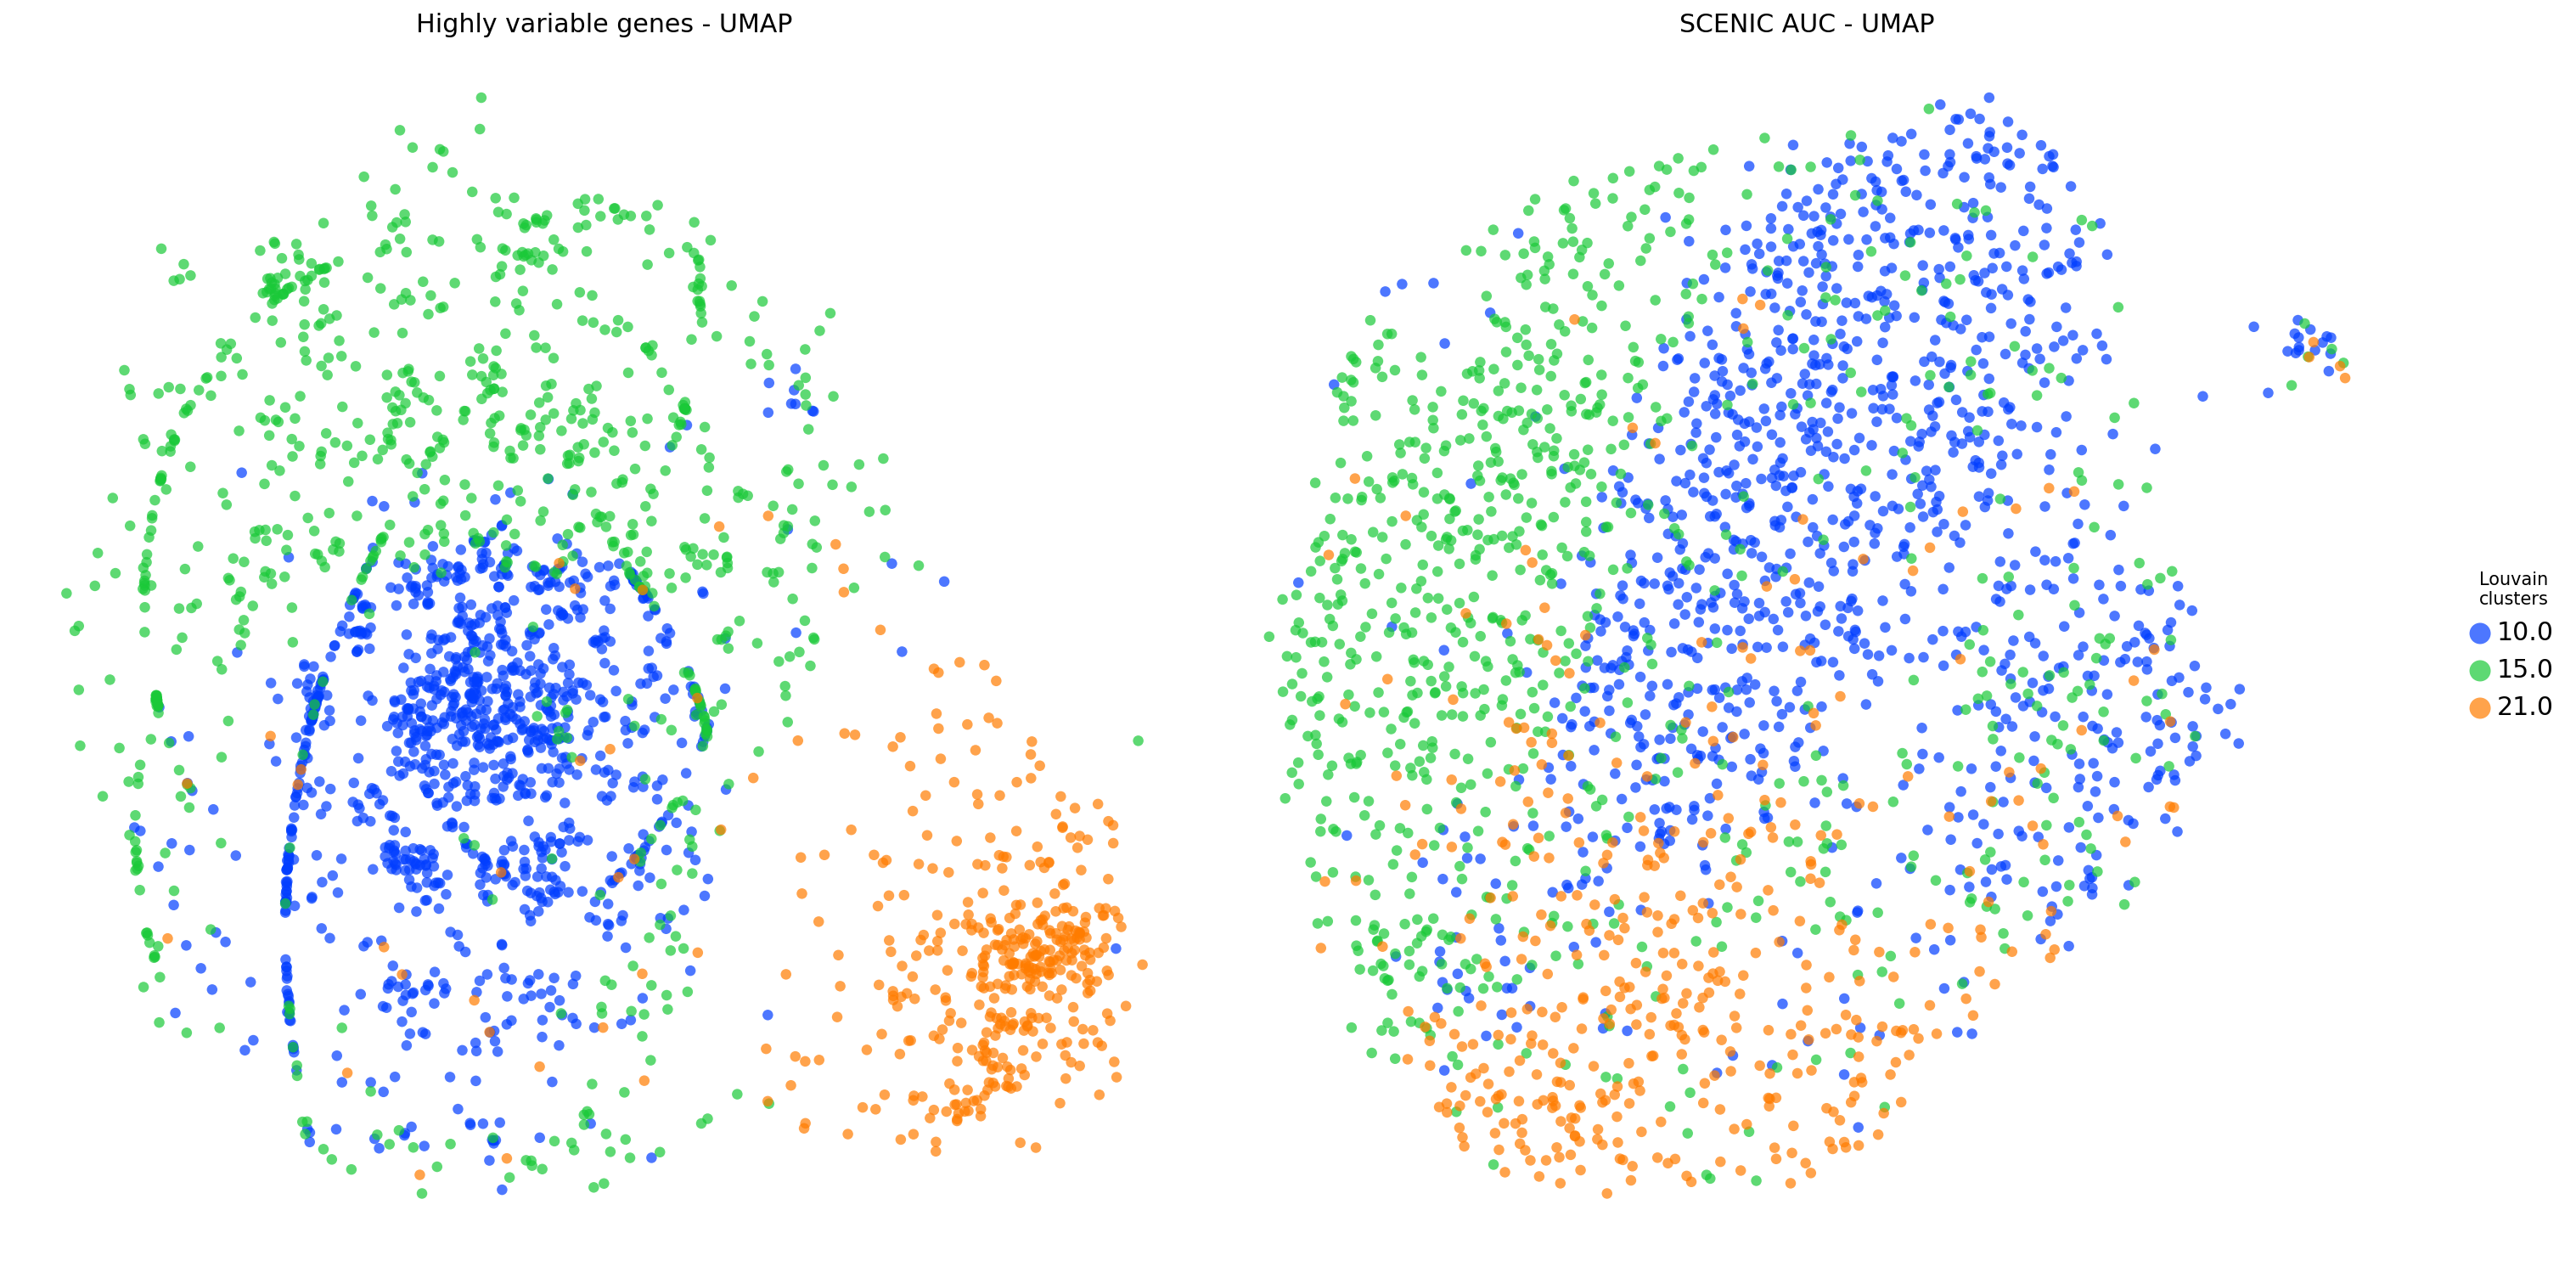

In [15]:
plt.rcParams.update({'font.size':12})

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10), dpi=150 )

drplot( dr[0], colorlab=cellAnnot['Louvain_clusters_Scanpy'], ax=ax1, palette='bright', s=2, title='Highly variable genes - UMAP' )

drplot( dr[4], colorlab=cellAnnot['Louvain_clusters_Scanpy'], ax=ax2, palette='bright', s=2, title='SCENIC AUC - UMAP' )
ax2.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1, markerscale=2, fontsize='x-large', frameon=False, title="Louvain\nclusters")

plt.tight_layout()
plt.savefig("Kenyon_Control_dimred_umap-hvg-scenic-louvain.pdf", dpi=600, bbox_inches = "tight")

In [22]:
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns
from pyscenic.binarization import binarize

In [18]:
# calculate RSS
rss_cellType = regulon_specificity_scores( auc_mtx, cellAnnot['Celltype_Garnett'] )
rss_cellType

,Atf3_(+),BEAF-32_(+),Blimp-1_(+),CG12769_(+),CG14667_(+),CG16779_(+),CG5641_(+),CG9727_(+),CHES-1-like_(+),Cf2_(+),...,kn_(+),lola_(+),maf-S_(+),nej_(+),pho_(+),rib_(+),scro_(+),sd_(+),usp_(+),vvl_(+)
Kenyon,0.283065,0.554408,0.934938,0.890551,0.427992,0.936364,0.833836,0.481607,0.880204,0.937871,...,0.216096,0.939127,0.860656,0.936467,0.847527,0.251228,0.627215,0.921918,0.453844,0.62742


In [20]:
rss_cellType.to_csv("/mnt/data0/projects/biohub/hassan2022/output/SCENIC/pyscenic_workflow/KENYON/output/control_2/control_rss_cellType.csv")

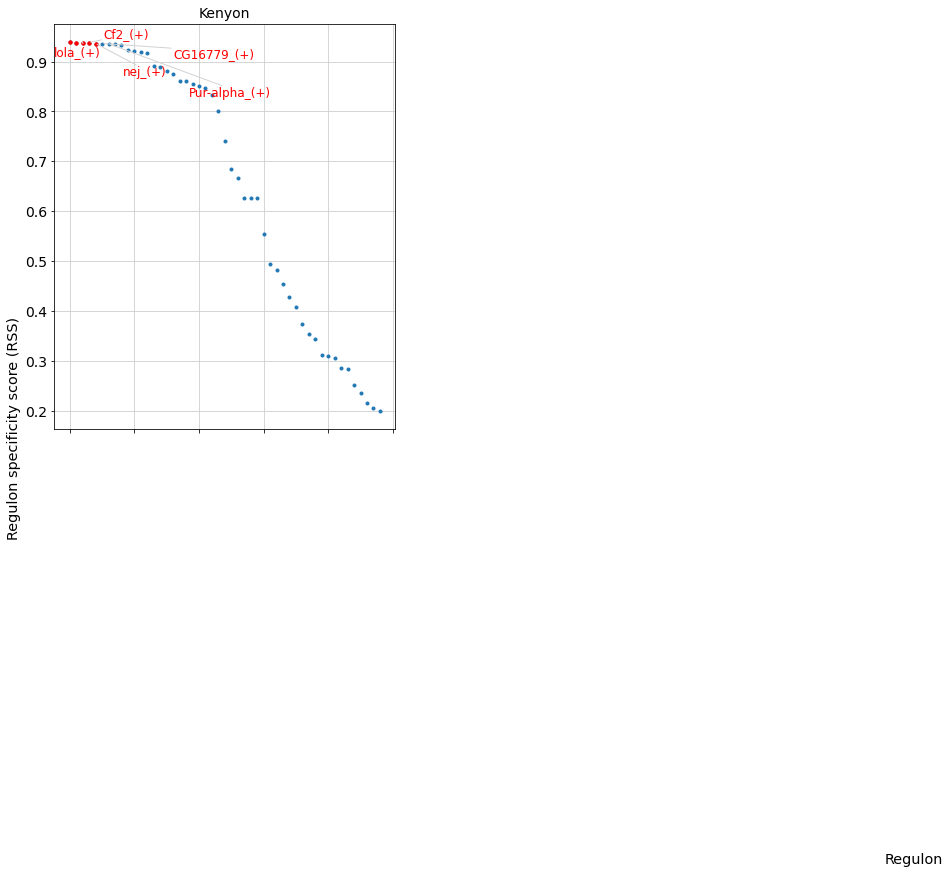

In [23]:
cats = sorted(list(set(cellAnnot['Celltype_Garnett'])))

fig = plt.figure(figsize=(25, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(2,5,num)
    plot_rss(rss_cellType, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("Kenyon_cellType-RSS-top5.pdf", dpi=600, bbox_inches = "tight")
plt.show()

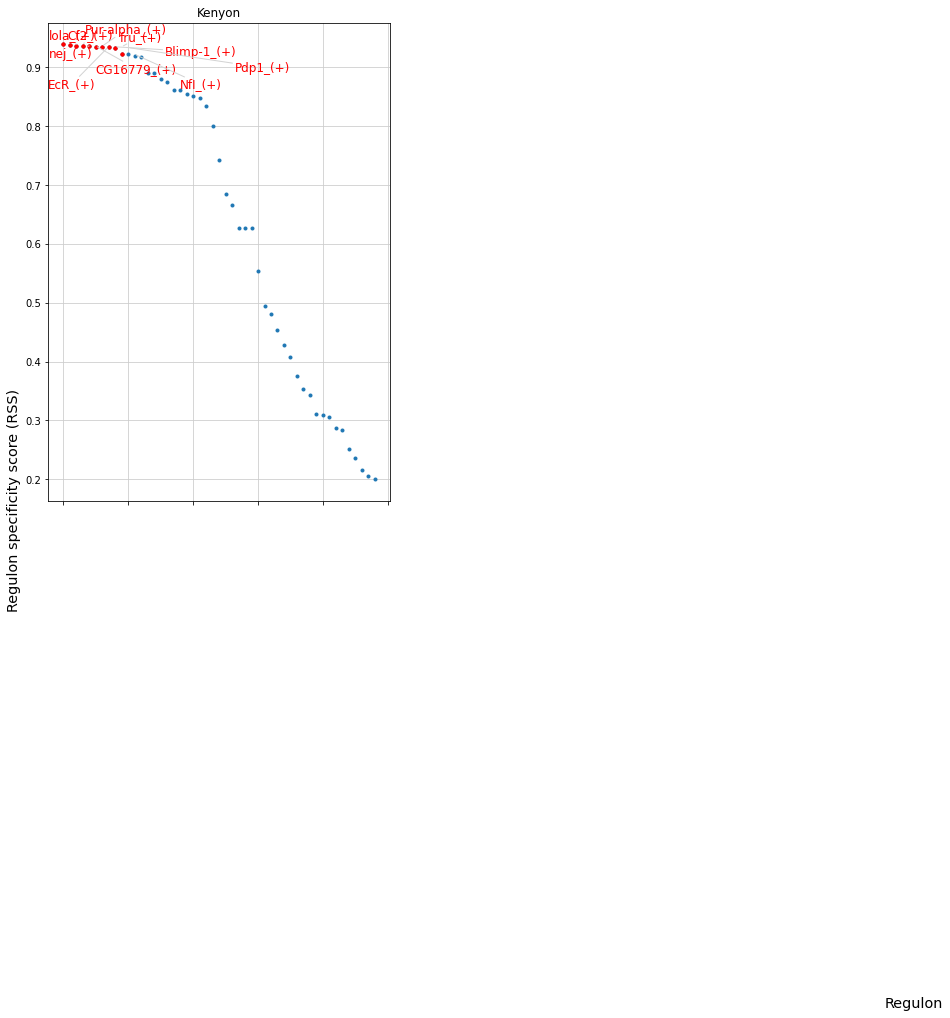

In [24]:
cats = sorted(list(set(cellAnnot['Celltype_Garnett'])))

fig = plt.figure(figsize=(25, 14))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(2,5,num)
    plot_rss(rss_cellType, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("Kenyon_cellType-RSS-top10.pdf", dpi=600, bbox_inches = "tight")
plt.show()

In [25]:
# top 1
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:1].index)
    )
topreg = list(set(topreg))

In [26]:
# generate Z - Score
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [27]:
# Generate Heat Map 
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [28]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in cellAnnot['Celltype_Garnett'] ]

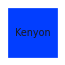

In [29]:

sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("Kenyon_Control_cellType-heatmap-legend-top1.pdf", dpi=600, bbox_inches = "tight")

In [30]:
# top 5
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [31]:
# generate Z - Score
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [32]:
# Generate Heat Map 
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

    

In [33]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in cellAnnot['Celltype_Garnett'] ]

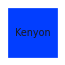

In [34]:

sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("Kenyon_Control_cellType-heatmap-legend-top5.pdf", dpi=600, bbox_inches = "tight")

/home/acicalo/miniconda3/envs/scenic/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


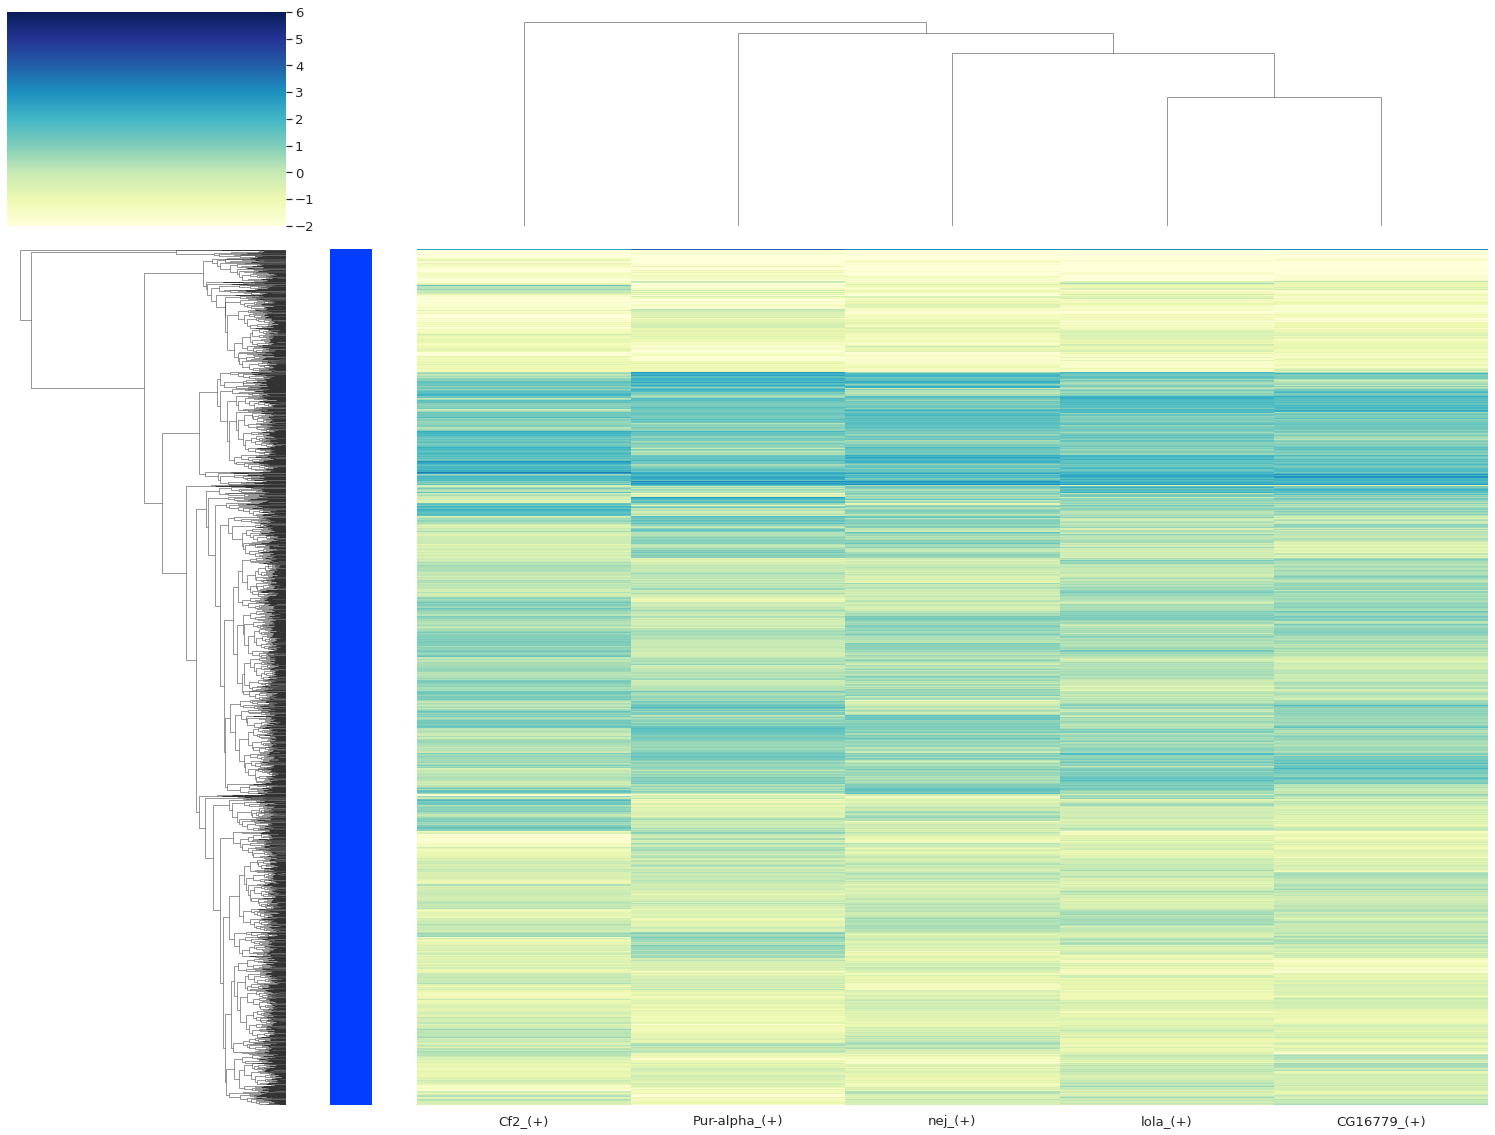

In [35]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("Kenyon_Control_cellType-heatmap-top5.pdf", dpi=600, bbox_inches = "tight")

In [36]:
# top 10
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:10].index)
    )
topreg = list(set(topreg))

In [37]:
# generate Z - Score
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [38]:
# Generate Heat Map 
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [39]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in cellAnnot['Celltype_Garnett'] ]

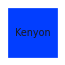

In [40]:

sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("Kenyon_Control_cellType-heatmap-legend-top10.pdf", dpi=600, bbox_inches = "tight")

/home/acicalo/miniconda3/envs/scenic/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


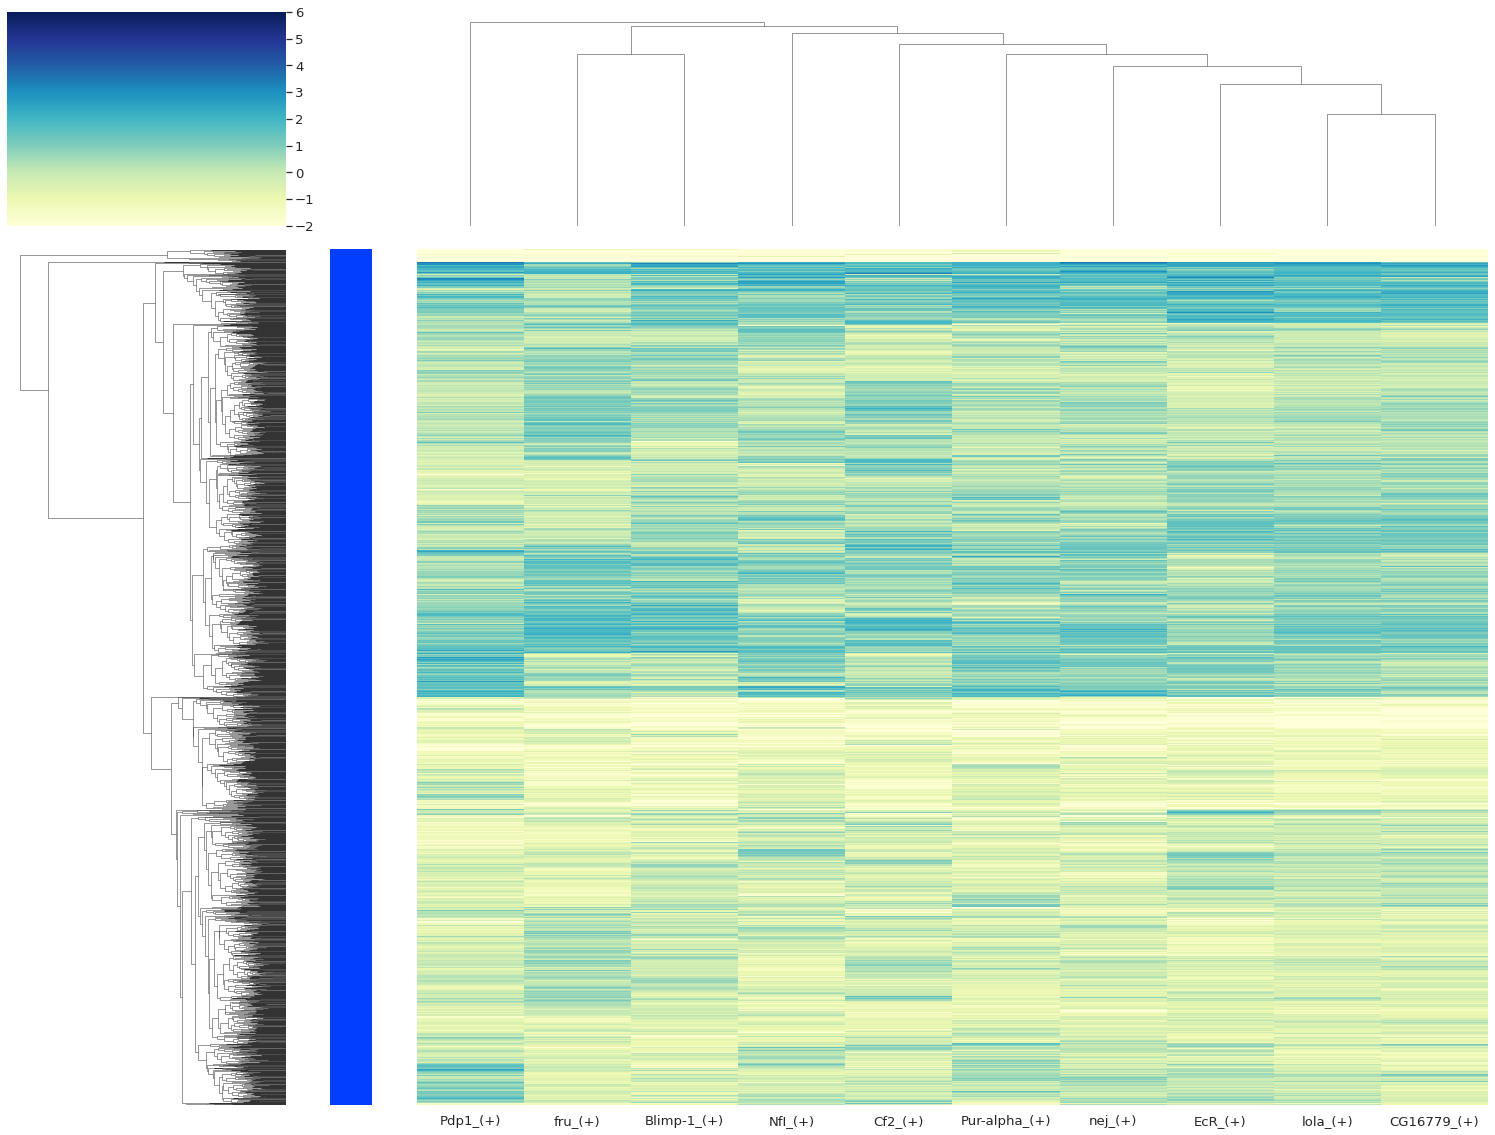

In [41]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("Kenyon_Control_cellType-heatmap-top10.pdf", dpi=600, bbox_inches = "tight")

In [42]:
auc_mtx

,Atf3_(+),BEAF-32_(+),Blimp-1_(+),CG12769_(+),CG14667_(+),CG16779_(+),CG5641_(+),CG9727_(+),CHES-1-like_(+),Cf2_(+),...,kn_(+),lola_(+),maf-S_(+),nej_(+),pho_(+),rib_(+),scro_(+),sd_(+),usp_(+),vvl_(+)
AAAGTCCAGTTACGGG-1_1,0.088323,0.000000,0.108758,0.080656,0.000000,0.127524,0.125124,0.000000,0.106066,0.088427,...,0.0,0.148351,0.032732,0.104884,0.132982,0.0,0.062952,0.106783,0.000000,0.013961
AAAGTCCCAAGACGGT-1_1,0.000000,0.125602,0.106581,0.061838,0.000000,0.142661,0.070420,0.033187,0.159008,0.087906,...,0.0,0.138487,0.145423,0.106525,0.087428,0.0,0.024912,0.119024,0.008753,0.014880
AAAGTGACACCAGCCA-1_1,0.000000,0.054267,0.117399,0.089891,0.098833,0.132956,0.085737,0.000000,0.191101,0.072703,...,0.0,0.131188,0.115153,0.119412,0.057688,0.0,0.043343,0.144407,0.009151,0.000525
AAATGGAGTACTCGTA-1_1,0.027253,0.007440,0.101846,0.063107,0.001823,0.106260,0.159141,0.000000,0.134573,0.071594,...,0.0,0.126613,0.169128,0.111747,0.041675,0.0,0.018684,0.108653,0.009648,0.012648
AACAAAGAGAGAGAAC-1_1,0.000000,0.046827,0.111541,0.059606,0.000000,0.128305,0.091904,0.000000,0.209640,0.110688,...,0.0,0.130036,0.149435,0.122268,0.132882,0.0,0.007827,0.156223,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGTCCAATCCC-1_5,0.000000,0.109190,0.114100,0.043589,0.000000,0.145596,0.194549,0.000000,0.139497,0.123400,...,0.0,0.150011,0.105945,0.125991,0.060971,0.0,0.000000,0.143704,0.013825,0.000000
TTTGGTTAGTGGTTCT-1_5,0.000000,0.000000,0.125389,0.056324,0.000000,0.175381,0.227770,0.034099,0.131777,0.121619,...,0.0,0.188088,0.118982,0.136456,0.245176,0.0,0.000000,0.147550,0.007659,0.000000
TTTGGTTCACCTGCGA-1_5,0.000000,0.015317,0.142086,0.097899,0.055799,0.174051,0.231749,0.000000,0.164965,0.114591,...,0.0,0.169094,0.143053,0.147184,0.093495,0.0,0.039303,0.186805,0.011836,0.000000
TTTGTTGCATGAAGGC-1_5,0.000000,0.099781,0.148785,0.051072,0.044493,0.181911,0.134872,0.051787,0.243800,0.126185,...,0.0,0.170836,0.097830,0.141990,0.207082,0.0,0.027268,0.206883,0.007858,0.000000


In [43]:
# Generate a binary regulon activity matrix
binary_mtx, auc_thresholds = binarize( auc_mtx, num_workers=50 )
binary_mtx.head()

,Atf3_(+),BEAF-32_(+),Blimp-1_(+),CG12769_(+),CG14667_(+),CG16779_(+),CG5641_(+),CG9727_(+),CHES-1-like_(+),Cf2_(+),...,kn_(+),lola_(+),maf-S_(+),nej_(+),pho_(+),rib_(+),scro_(+),sd_(+),usp_(+),vvl_(+)
AAAGTCCAGTTACGGG-1_1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
AAAGTCCCAAGACGGT-1_1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAGTGACACCAGCCA-1_1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAATGGAGTACTCGTA-1_1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AACAAAGAGAGAGAAC-1_1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
auc_thresholds.to_csv('auc_threshold.csv')
auc_mtx.to_csv('auc_mtx.csv')

/home/acicalo/miniconda3/envs/scenic/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/home/acicalo/miniconda3/envs/scenic/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/home/acicalo/miniconda3/envs/scenic/lib/python3

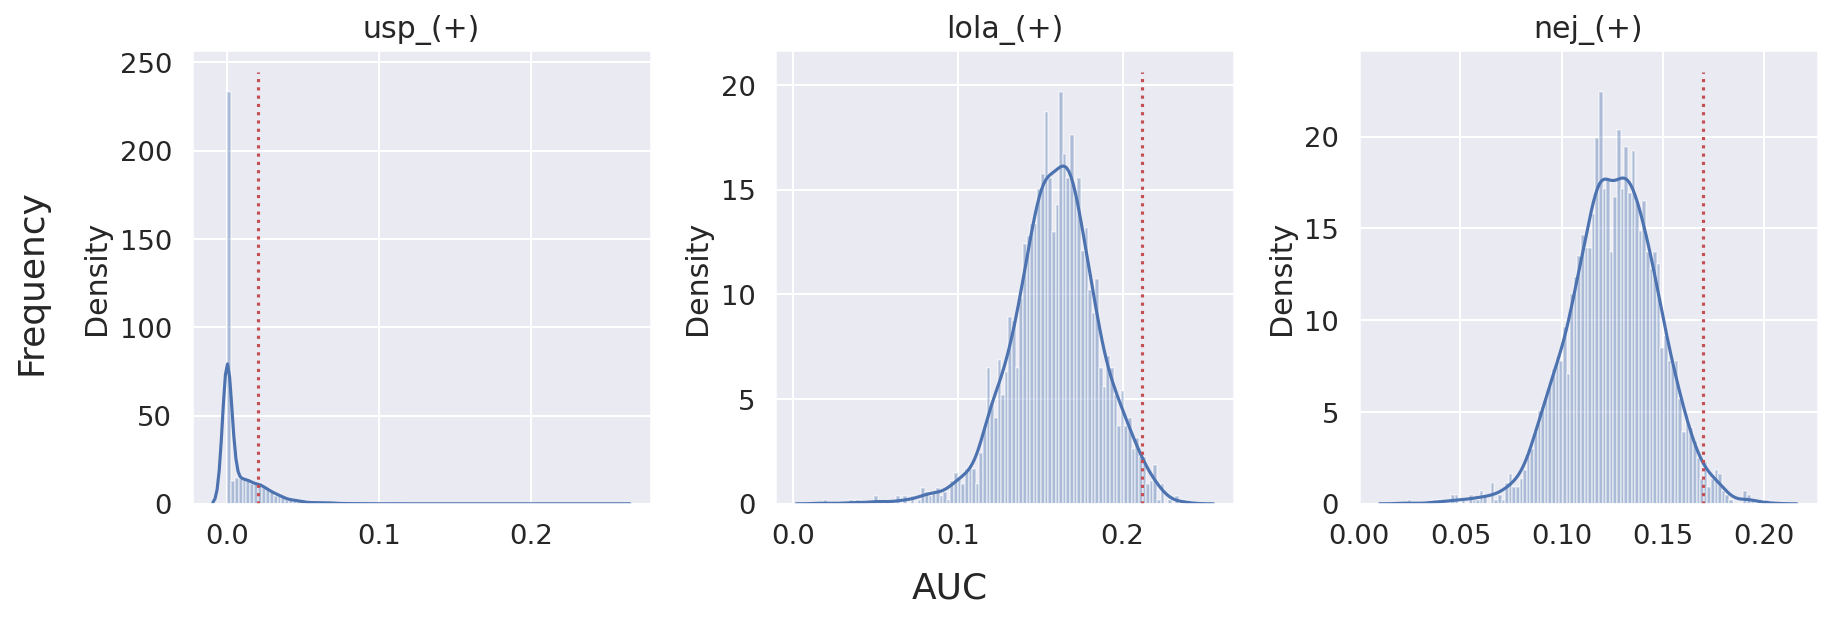

In [45]:
# select regulons:
r = ['usp_(+)','lola_(+)','nej_(+)' ]

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=False)
for i,ax in enumerate(axs):
    sns.distplot(auc_mtx[ r[i] ], ax=ax, norm_hist=True, bins=100)
    ax.plot( [ auc_thresholds[ r[i] ] ]*2, ax.get_ylim(), 'r:')
    ax.title.set_text( r[i] )
    ax.set_xlabel('')
    
fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='large')
fig.text(0.5, -0.01, 'AUC', ha='center', va='center', rotation='horizontal', size='large')

fig.tight_layout()
fig.savefig('Kenyon_Control_cellType-binaryPlot2.pdf', dpi=600, bbox_inches='tight')

In [46]:
rss_louvain = regulon_specificity_scores( auc_mtx, cellAnnot['Louvain_clusters_Scanpy'] )
rss_louvain


,Atf3_(+),BEAF-32_(+),Blimp-1_(+),CG12769_(+),CG14667_(+),CG16779_(+),CG5641_(+),CG9727_(+),CHES-1-like_(+),Cf2_(+),...,kn_(+),lola_(+),maf-S_(+),nej_(+),pho_(+),rib_(+),scro_(+),sd_(+),usp_(+),vvl_(+)
15.0,0.277519,0.323909,0.440803,0.444447,0.294754,0.455612,0.429443,0.349356,0.416907,0.445101,...,0.225807,0.453315,0.425665,0.440854,0.470365,0.199257,0.327749,0.413374,0.36534,0.380237
10.0,0.241881,0.467270,0.534320,0.509327,0.351403,0.521564,0.520417,0.394312,0.546579,0.527211,...,0.189397,0.518886,0.508016,0.523989,0.497965,0.258105,0.492479,0.552799,0.31780,0.389325
21.0,0.202705,0.277715,0.316178,0.329629,0.292464,0.314392,0.312240,0.243464,0.315500,0.319864,...,0.197051,0.320644,0.342522,0.328347,0.298796,0.209340,0.319338,0.325002,0.28888,0.387848


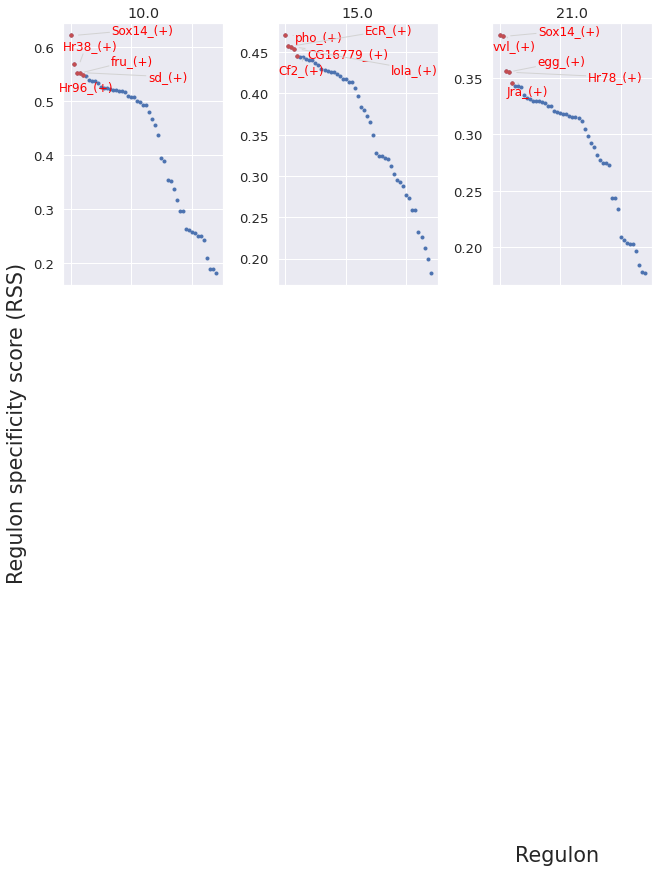

In [47]:
cats = sorted( list(set(cellAnnot['Louvain_clusters_Scanpy'])), key=int )

fig = plt.figure(figsize=(15, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_louvain.T[c]
    ax = fig.add_subplot(3,5,num)
    plot_rss(rss_louvain, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("Kenyon_TauKI_Louvain-RSS-top5.png", dpi=150, bbox_inches = "tight")
plt.show()

In [48]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_louvain.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [49]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f


In [50]:

colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in cellAnnot['Louvain_clusters_Scanpy'] ]

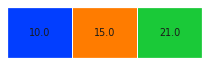

In [51]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)

/home/acicalo/miniconda3/envs/scenic/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 11.551999999999694, '')

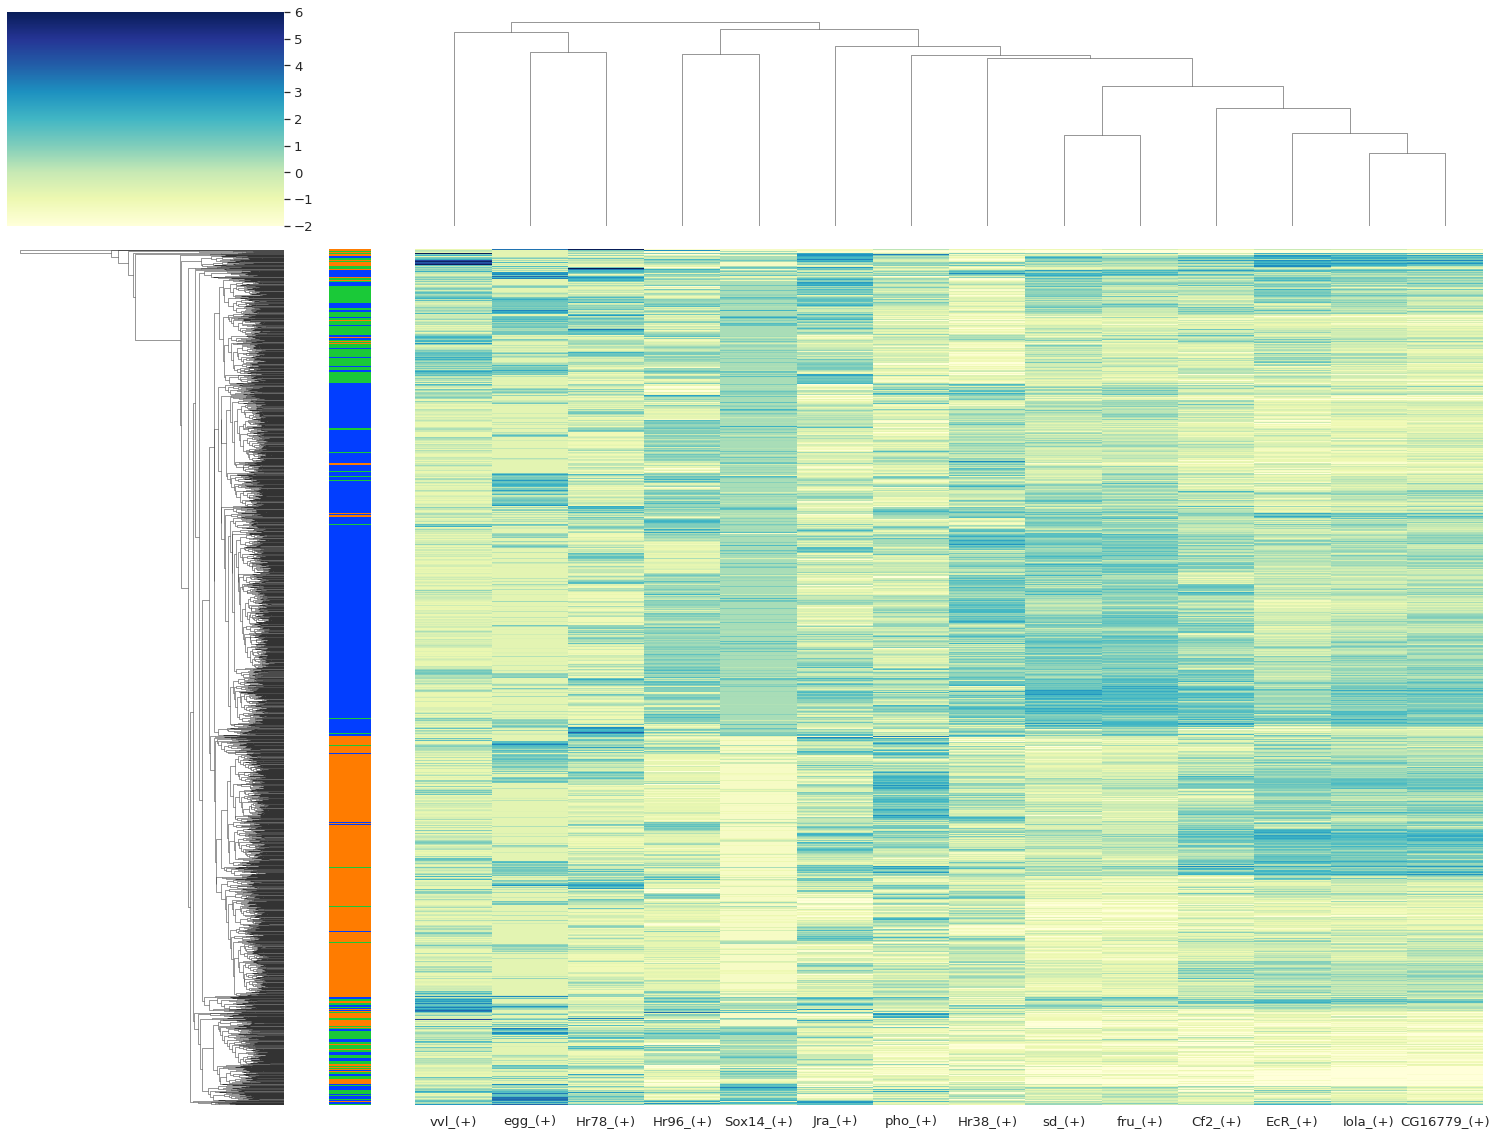

In [52]:

sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')    
g.ax_heatmap.set_xlabel('')    

In [5]:
adjacencies = pd.read_csv("control_adj.csv", index_col=False)


In [6]:
from pyscenic.utils import modules_from_adjacencies
modules = list(modules_from_adjacencies(adjacencies, exprMat))


2023-09-12 10:16:10,381 - pyscenic.utils - INFO - Calculating Pearson correlations.

2023-09-12 10:16:10,774 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [False].

2023-09-12 10:16:30,809 - pyscenic.utils - INFO - Creating modules.


In [9]:
tf = 'E_(bx)'
tf_mods = [ x for x in modules if x.transcription_factor==tf ]

for i,mod in enumerate( tf_mods ):
    print( f'{tf} module {str(i)}: {len(mod.genes)} genes' )
print( f'{tf} regulon: {len(regulons[tf+"_(+)"])} genes' )

E_(bx) regulon: 126 genes


In [74]:
for i,mod in enumerate( tf_mods ):
    with open( tf+'_module_'+str(i)+'.txt', 'w') as f:
        for item in mod.genes:
            f.write("%s\n" % item)
            
with open( tf+'_regulon.txt', 'w') as f:
    for item in regulons[tf+'_(+)']:
        f.write("%s\n" % item)